<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="left">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

In [ ]:
import warnings
warnings.filterwarnings('ignore')

<h1 align=left><font size = 6, style="color:rgb(200,0,0)">Lab</font></h1>
<hr>
<font size = 5> Clusterização Hierárquica</font>

# Recordando a Teoria

Reveja aqui o processo complete o Clusterização Hierárquica.

```
Importar os dados
df= pd.read_csv("..../ .csv")

1.   # Definir os dados (culunas) do modelo
X = df[...]

2.   # Normalização e outras preparações dos dados
from sklearn.preprocessing import normalize
X = normalize(X)

3.   # Avalia o número de agrupamentos desejado
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

for n_clusters in range(2,8):
  clf = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')  
  clf.fit_predict(X)
  labels = clf.labels_
  print('Média do valor de Silhouette para ', n_clusters , ' clusters: ',silhouette_score(X, labels, metric='euclidean'))

4.   ## Declarar e treinar o modelo - considerando o número de cluster apontado no item anterior
clf = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
clf.fit(X)

5.   # Resultados
labels = clf.labels_
print(labels)

6.   # Associando os dados
df['cluster'] = labels
print(df.head())
```

# Exemplo.  **E-commerce**

Este é um conjunto de dados transacionais que contém todas as transações ocorridas entre 01/12/2010 e 09/12/2011 para uma loja virtual no Reino Unido. A empresa vende principalmente presentes únicos para todas as ocasiões. Muitos clientes da empresa são atacadistas.

*   **CustomerID:** número inteiro de 5 dígitos atribuído exclusivamente a cada cliente.
*   **Recency**: Número de dias desde a última compra.
*   **Frequency**: Número de compras realizadas pelo cliente
*   **Amount**: Valor total das compras (receita contribuída)

In [ ]:
import pandas as pd
df=pd.read_csv("http://www.orlandoalbarracin.com.br/phyton/retail_dataset_.csv")
df.head()

,Unnamed: 0,CustomerID,Amount,Frequency,Recency
0,0,12347.0,4310.00,182,1
1,1,12348.0,1797.24,31,74
2,2,12349.0,1757.55,73,18
3,3,12350.0,334.40,17,309
4,4,12352.0,1545.41,95,35


In [ ]:
# Explore a base de dados!


In [ ]:
X = df[['Amount', 'Frequency', 'Recency']]
X

,Amount,Frequency,Recency
0,4310.00,182,1
1,1797.24,31,74
2,1757.55,73,18
3,334.40,17,309
4,1545.41,95,35
...,...,...,...
4317,180.60,10,277
4318,80.82,7,180
4319,176.60,13,7
4320,2094.88,756,3


In [ ]:
#Normalizando os dados

from sklearn.preprocessing import normalize
X = normalize(X)

In [ ]:
# Avaliando o número de agrupamentos usando a silhouette

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

for n_clusters in range(2,8):
  clf = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
  clf.fit_predict(X)
  labels = clf.labels_
  print('Média do valor de Silhouette para ', n_clusters , ' clusters: ', silhouette_score(X, labels, metric='euclidean'))


Média do valor de Silhouette para  2  clusters:  0.7382121184741594
Média do valor de Silhouette para  3  clusters:  0.6525249251163979
Média do valor de Silhouette para  4  clusters:  0.5450074113526773
Média do valor de Silhouette para  5  clusters:  0.545881302504618
Média do valor de Silhouette para  6  clusters:  0.5367858999838558
Média do valor de Silhouette para  7  clusters:  0.5395401112134732


In [ ]:
#Declarando e treinando o modelo. Associando os clusters

clf = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
clf.fit(X)
labels = clf.labels_

df['cluster'] = labels
df.head()

,Unnamed: 0,CustomerID,Amount,Frequency,Recency,cluster
0,0,12347.0,4310.00,182,1,1
1,1,12348.0,1797.24,31,74,1
2,2,12349.0,1757.55,73,18,1
3,3,12350.0,334.40,17,309,0
4,4,12352.0,1545.41,95,35,1


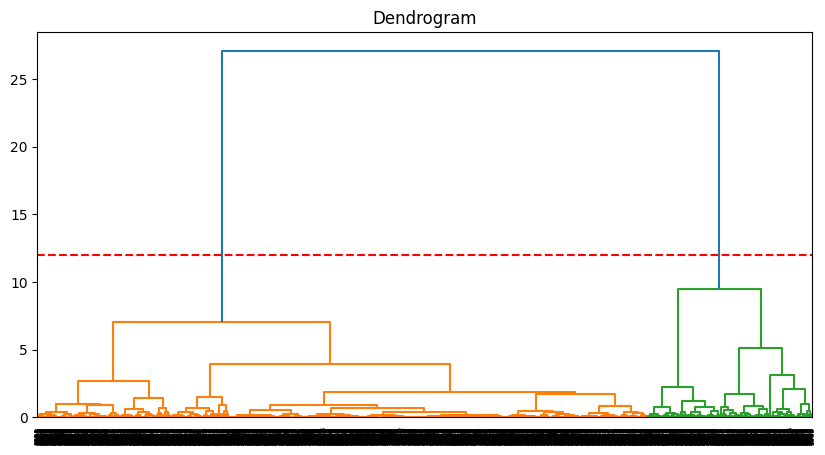

In [ ]:
# Fazendo dendograma

import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.title("Dendrogram")
plt.xticks(rotation=90)

dendrogram = shc.dendrogram(shc.linkage(X, method='ward')) # cuidado com o nome
plt.axhline(y=12, color='r', linestyle='--')

plt.show()


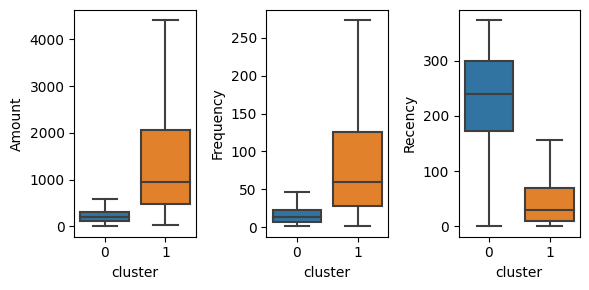

In [ ]:
# Analisando os grupos!

import seaborn as sns

f, axis = plt.subplots(1,3, figsize=(6,3))
sns.boxplot(x='cluster', y='Amount', data=df, showfliers = False,ax=axis[0])
sns.boxplot(x='cluster', y='Frequency', data=df, showfliers = False,ax=axis[1])
sns.boxplot(x='cluster', y='Recency', data=df, showfliers = False,ax=axis[2])

plt.tight_layout()

Note que o Cluster 1 se refere aos clientes com maior renda e que fazem compras com maior frequência.

# Exercício: **Airbnb NYC 2019**



Neste data set você encontra dados do Airbnb de NYC de 2019. Explore os dados e em seguida faça uma clusterização dos imóveis com base nos atributos numérico e o tipo de apartamento (`room_type`).

Durante a aula vamos usar a versão reduzida da base de dados:
*   https://meusite.mackenzie.br/rogerio/TIC/AB_NYC_2019_TIC.csv

Para responder o questionário use:
*   https://meusite.mackenzie.br/rogerio/TIC/AB_NYC_2019.csv

## Exercício. Acesse e Explore os dados

In [ ]:
# Seu Código
import pandas as pd
df=pd.read_csv("https://meusite.mackenzie.br/rogerio/TIC/AB_NYC_2019_TIC.csv")
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,20913,Charming 1 bed GR8 WBurg LOCATION!,79402,Christiana,Brooklyn,Williamsburg,40.70984,-73.95775,Entire home/apt,100,5,168,2018-07-22,1.57,1,0
1,25235,Large 2 Bedroom Great for Groups!,87773,Shelly,Brooklyn,Bedford-Stuyvesant,40.68373,-73.92377,Entire home/apt,125,90,162,2019-06-28,1.46,2,137
2,76761,Eveland the Place to Stay & Enjoy a 5-⭐️ 2bdrm,118971,Evelyn,Brooklyn,South Slope,40.66552,-73.99019,Entire home/apt,169,2,398,2019-06-28,3.97,3,182


##  Verifique a presença de Nulos
Verifique se existem dados nulas e, se houver, escolha eliminar esses casos.

DICA: `isna()`, `dropna()`

In [ ]:
# Seu Código


## Faça o Hot Encode da variável `room_type`

Verifique os valores de `room_type` e faça o *Hot Encode*. Você pode  mudar o nome dos atributos ao final usando `rename`.

DICAS:
```
# Hot encode
dummies = pd.get_dummies(df.<atributo>,prefix='<prefix>')
df = pd.concat([df, dummies],axis=1)

# Rename Columns
df.rename(columns={'antes1':'depois1', 'antes2':'depois'},inplace=True)
```

In [ ]:
# Seu Código


## Defina a entrada `X` selecionando as variáveis de interesse

Considere somente as variáveis numéricas e o *hot encode* de `room_type`

In [ ]:
# Seu Código


## Normalize os dados

Use a função `normalize` da biblioteca `sklearn.preprocessing`.

In [ ]:
# Seu Código


## Selecione o número de Clusters

Empregando a Clusterização Hierárquica Aglomerativa, com distência Euclidiana e `linkage='ward'` determine o número de clusters usando a métrica `Siclhouette`.




In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Seu Código


## Clusterize os dados

Exiba os rótulos (labels) gerados. Adicione então os labels ao dataframe original em uma nova coluna `cluster`.

In [ ]:
from sklearn.cluster import AgglomerativeClustering



##  Exiba o Dendograma

In [ ]:
# Seu código
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 7))
plt.title("Dendrogram")
plt.xticks(rotation=90)

dendrogram =
plt.axhline(y=6, color='r', linestyle='--')

plt.show()


## Caracterizando os grupos (**RESOLVIDO**)

Verificando os valores médios de cada grupo.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

g = df[['latitude', 'longitude','price',
       'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'rtype_entire', 'rtype_private', 'rtype_shared',
        'cluster']]

f = plt.figure(figsize=(12,5))
sns.barplot(data=g[g.cluster==0].drop(columns='cluster'))
plt.xticks(rotation=45)
plt.title('...')
plt.show()

f = plt.figure(figsize=(12,5))
sns.barplot(data=g[g.cluster==1].drop(columns='cluster'))
plt.xticks(rotation=45)
plt.title('...')
plt.show()

NameError: ignored